# Bank Term Deposits - Data Exploration

## Data Set Information

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

[Source](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

**bank client data:**

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign**

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). **Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.**

**other attributes:**

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    **(TO DO : Add a flag for 999)**
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target)**

21. y - has the client subscribed a term deposit? (binary: 'yes','no')



## Import Packages and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns


import os
import requests
import zipfile

# %matplotlib inline 
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.4f}'.format

def downloadAndExtract(url, localFolder,localFile, chunkSize=128):
    localPath = os.path.join(localFolder,localFile)
    
    r = requests.get(url, stream=True)
    with open(localPath, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunkSize):
            fd.write(chunk)
    
    with zipfile.ZipFile(localPath) as zf: 
        zf.extractall(localFolder)

URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

localFolder = "../data"
localFile = "bank-additional.zip"

# downloadAndExtract(URL,localFolder,localFile)

data = pd.read_csv('../data/bank-additional/bank-additional-full.csv',sep=';')

#Remove duration as noted in comments above
data.drop(columns = "duration",inplace = True)

#Convert target to y=1 and n=0 and rename columun
data["y"][data["y"] == 'yes'] = 1.
data["y"][data["y"] == 'no'] = 0.
data.rename(columns={"y":"target"}, inplace = True)
data["target"] = data["target"].astype(int)



## Dataset - Quick Views

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1000,93.9940,-36.4000,4.8570,5191.0000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [5]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,41188.0000,41188.0000,41188.0000,41188.0000,41188.0000,41188.0000,41188.0000,41188.0000,41188.0000,41188.0000
mean,40.0241,2.5676,962.4755,0.1730,0.0819,93.5757,-40.5026,3.6213,5167.0359,0.1127
std,10.4212,2.7700,186.9109,0.4949,1.5710,0.5788,4.6282,1.7344,72.2515,0.3162
min,17.0000,1.0000,0.0000,0.0000,-3.4000,92.2010,-50.8000,0.6340,4963.6000,0.0000
25%,32.0000,1.0000,999.0000,0.0000,-1.8000,93.0750,-42.7000,1.3440,5099.1000,0.0000
50%,38.0000,2.0000,999.0000,0.0000,1.1000,93.7490,-41.8000,4.8570,5191.0000,0.0000
75%,47.0000,3.0000,999.0000,0.0000,1.4000,93.9940,-36.4000,4.9610,5228.1000,0.0000
max,98.0000,56.0000,999.0000,7.0000,1.4000,94.7670,-26.9000,5.0450,5228.1000,1.0000


## Target variable proportions

* Target variable slightly imbalanced

In [6]:
data["target"].value_counts() / len(data["target"])

0   0.8873
1   0.1127
Name: target, dtype: float64

## Numeric features

* The age feature can be transformed to normal using log transformation
* For the rest of the features, need to find appropriate transformation
    

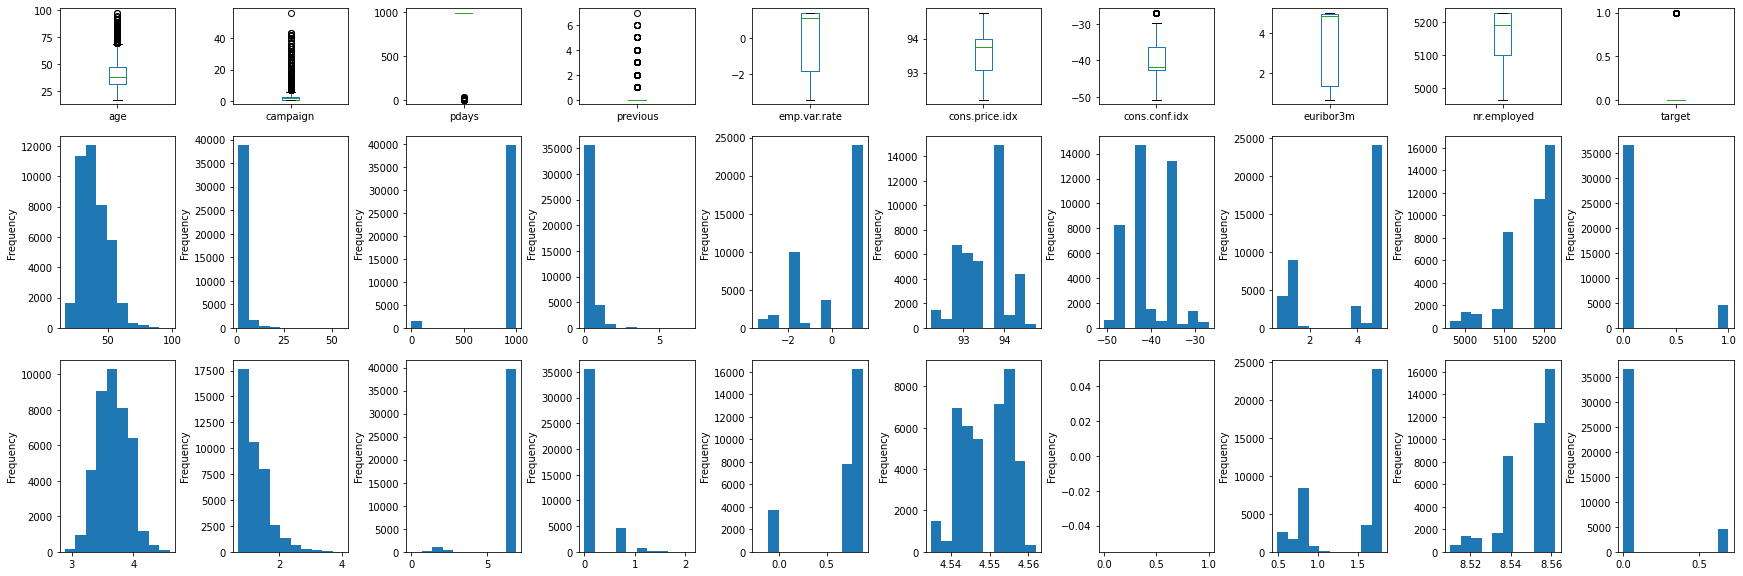

In [7]:
#https://stackoverflow.com/questions/33381330/histogram-with-boxplot-above-in-python

cols=data.select_dtypes(exclude = 'object').columns

fig, (axs_box,axs_hist,axs_log) = plt.subplots(nrows = 3,ncols=10 ,figsize=(30, 10), gridspec_kw={"height_ratios": (.2,.4,.4)})
fig.subplots_adjust(hspace=0.2,wspace=0.5)

for ax_box,ax_hist,ax_log,col in zip(axs_box.flatten(),axs_hist.flatten(),axs_log.flatten(),cols):    
    data[col].plot(kind="box",ax=ax_box) #,vert = False)    
    data[col].plot(kind="hist",ax=ax_hist)
    np.log1p(data[col]).plot(kind="hist",ax=ax_log)
    

fig.show()


## Non numeric columns

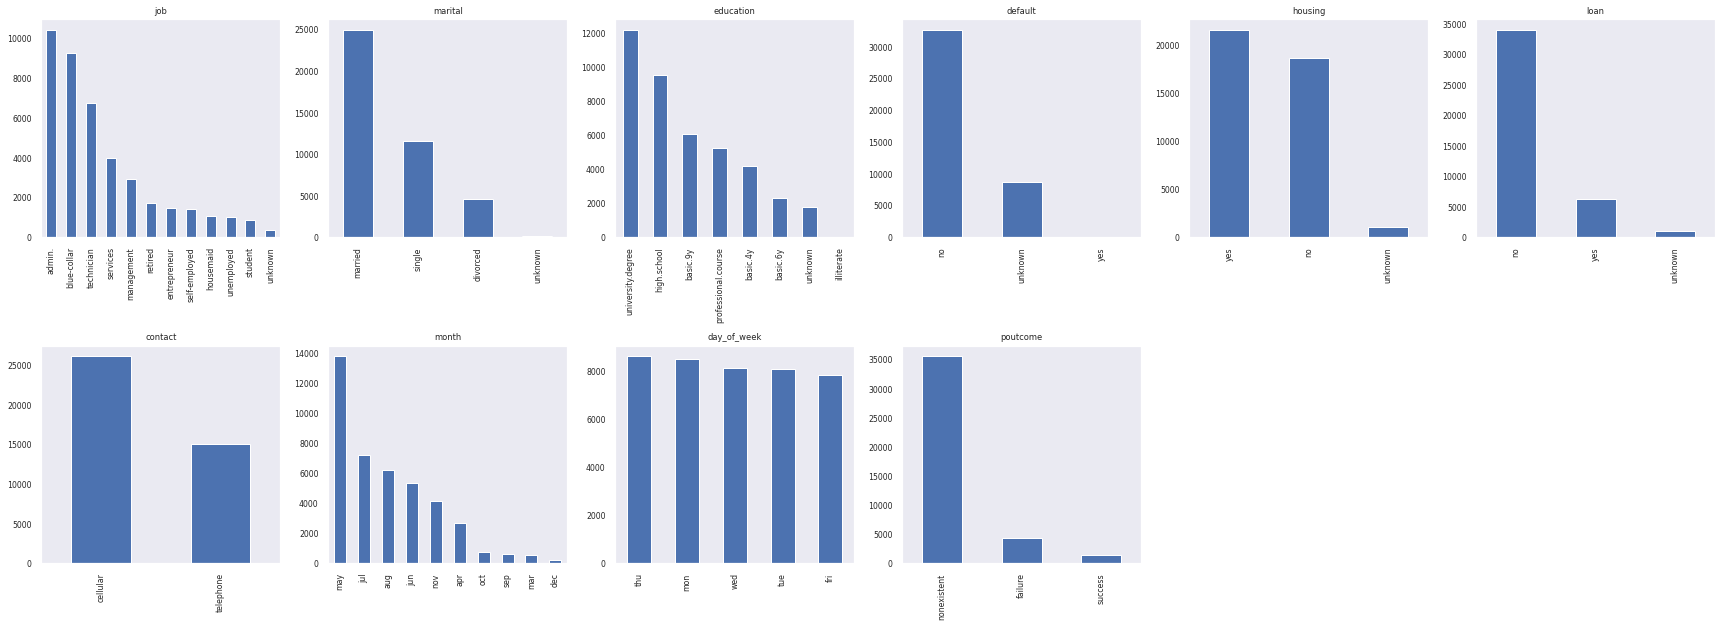

In [18]:
cols = data.select_dtypes(include = 'object').columns

fig, axs = plt.subplots(2,6)
fig.subplots_adjust(hspace=0.5)
fig.set_size_inches(30,10)





# Flatten the axs array and use Zip to pass multiple values to the loop
for ax, col in zip(axs.flatten(),cols):
    data[col].value_counts().plot(kind="bar", ax=ax,rot = 90).set_title(col)    
    ax.grid()

axs[1,4].set_axis_off()
axs[1,5].set_axis_off()
plt.gca().invert_xaxis()
fig.show()



## Correlations of numeric variables

In [9]:
corr_matrix = data.corr()


In [10]:
#Correlation of the target variable
corr_matrix["target"].sort_values()

nr.employed      -0.3547
pdays            -0.3249
euribor3m        -0.3078
emp.var.rate     -0.2983
cons.price.idx   -0.1362
campaign         -0.0664
age               0.0304
cons.conf.idx     0.0549
previous          0.2302
target            1.0000
Name: target, dtype: float64

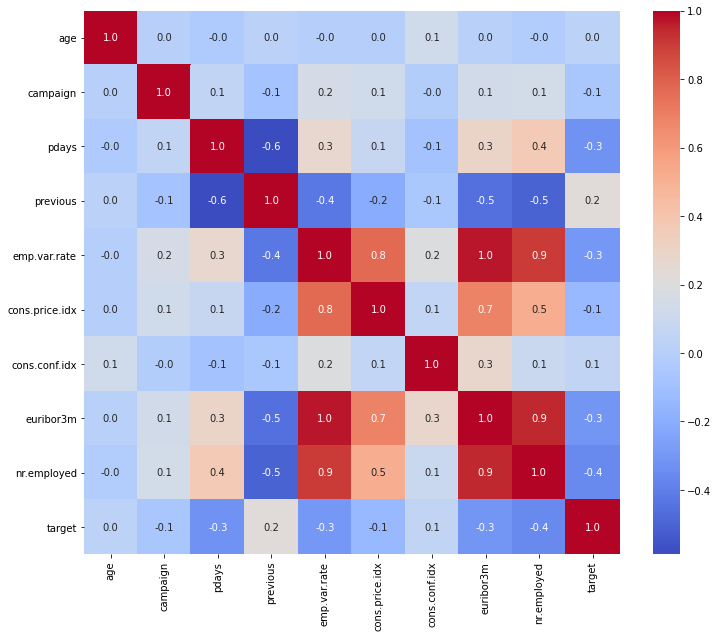

In [11]:
plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix,annot=True,fmt='0.1f',cmap = sns.color_palette("coolwarm", as_cmap=True)) #,annot_kws={"size": 4})

sns.set(font_scale=0.7)


* Following features have high number of duplicates because they are quarterly numbers : 'emp.var.rate', 'euribor3m', 'nr.employed','cons.conf.idx','cons.price.idx'
* The correlation does not reduce after de-duping

       emp.var.rate  euribor3m  nr.employed  cons.conf.idx  cons.price.idx
0            1.1000     4.8570    5191.0000       -36.4000         93.9940
756          1.1000     4.8560    5191.0000       -36.4000         93.9940
1146         1.1000     4.8550    5191.0000       -36.4000         93.9940
2655         1.1000     4.8590    5191.0000       -36.4000         93.9940
3072         1.1000     4.8600    5191.0000       -36.4000         93.9940
...             ...        ...          ...            ...             ...
41149       -1.1000     1.0390    4963.6000       -50.8000         94.7670
41158       -1.1000     1.0350    4963.6000       -50.8000         94.7670
41165       -1.1000     1.0300    4963.6000       -50.8000         94.7670
41171       -1.1000     1.0310    4963.6000       -50.8000         94.7670
41179       -1.1000     1.0280    4963.6000       -50.8000         94.7670

[375 rows x 5 columns]


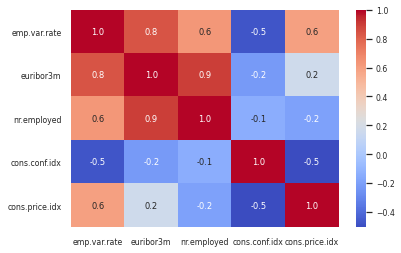

In [12]:
cols = ['emp.var.rate', 'euribor3m', 'nr.employed','cons.conf.idx','cons.price.idx']
print(data[cols].drop_duplicates())

corr2 = data[cols].drop_duplicates().corr()

plt.figure()
sns.heatmap(corr2,annot=True,fmt='0.1f',cmap = sns.color_palette("coolwarm", as_cmap=True)) #,annot_kws={"size": 4})

sns.set(font_scale=0.7)
